<a href="https://colab.research.google.com/github/itzelgabrielaroquedelgado076-cell/Estad-stica2025B/blob/main/Test_energy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url="https://raw.githubusercontent.com/itzelgabrielaroquedelgado076-cell/Estad-stica2025B/refs/heads/main/test_energy_data.csv"

df=pd.read_csv(url)
df= df.dropna()

df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [2]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [3]:
df.columns=['tipo_de_edificio', 'tamaño_del_edificio', 'numero_de_ocupantes',
       'electrodomesticos_utilizados', 'temperatura_promedio', 'dia_de_la_semana',
       'consumo_de_energia']
df

,tipo_de_edificio,tamaño_del_edificio,numero_de_ocupantes,electrodomesticos_utilizados,temperatura_promedio,dia_de_la_semana,consumo_de_energia
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#Y~X
modelo_lineal = ols(
    'consumo_de_energia~ C(tipo_de_edificio)+ tamaño_del_edificio + numero_de_ocupantes + electrodomesticos_utilizados + temperatura_promedio + C(dia_de_la_semana)',
    data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(tipo_de_edificio),2.0,1.478319e+07,7.391595e+06,3.746118e+10,0.000000e+00
C(dia_de_la_semana),1.0,2.727974e+06,2.727974e+06,1.382558e+10,0.000000e+00
tamaño_del_edificio,1.0,3.387918e+07,3.387918e+07,1.717023e+11,0.000000e+00
numero_de_ocupantes,1.0,9.275636e+06,9.275636e+06,4.700965e+10,0.000000e+00
electrodomesticos_utilizados,1.0,7.842723e+06,7.842723e+06,3.974753e+10,0.000000e+00
temperatura_promedio,1.0,1.137355e+05,1.137355e+05,5.764203e+08,1.815926e-314
Residual,92.0,1.815284e-02,1.973135e-04,NaN,NaN


In [5]:
#El valor-p es menor al nivel de significacia de 0.05 por lo que se rechaza la hipótesis nula por lo que si hay relación o diferencia y todas las variables son importantes.

In [6]:
df["tipo_de_edificio"].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1      group2    meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------
Commercial  Industrial   94.8042  0.877  -367.1835  556.7919  False
Commercial Residential -727.5898 0.0006 -1174.3106 -280.8689   True
Industrial Residential  -822.394    0.0 -1236.0386 -408.7494   True
-------------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

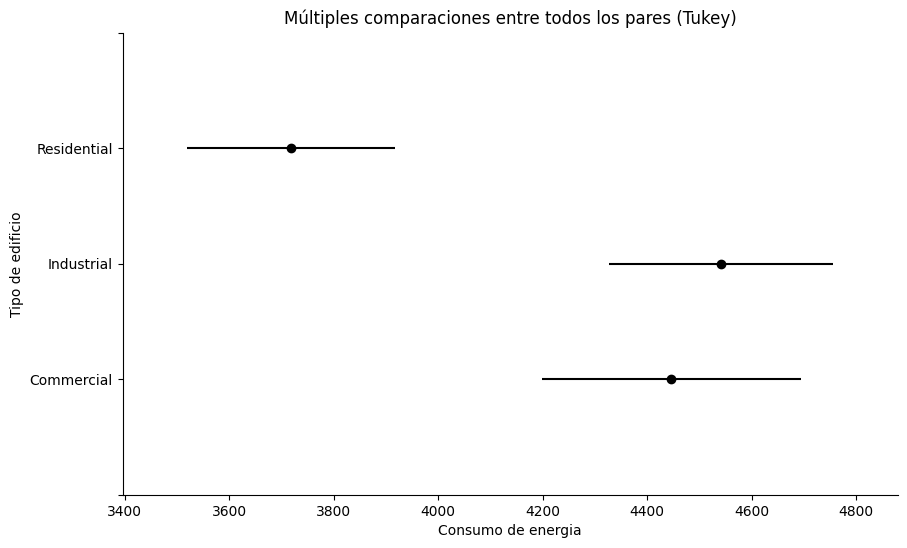

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['consumo_de_energia'], #variable de respuesta
    groups=df['tipo_de_edificio'], #variable categorica
    alpha=nivel_de_significancia) #nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tipo de edificio", xlabel="Consumo de energia")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Muestra los intervalos o niveles de confianza en las lineas, lo cual según el gráfico el tipo de edificio que
#consume más energia es el insutrial

In [8]:
df["tipo_de_edificio"]=df["tipo_de_edificio"].map({"Residential":0,"Commercial":1,"Industrial":2})
df

,tipo_de_edificio,tamaño_del_edificio,numero_de_ocupantes,electrodomesticos_utilizados,temperatura_promedio,dia_de_la_semana,consumo_de_energia
0,0,24563,15,4,28.52,Weekday,2865.57
1,1,27583,56,23,23.07,Weekend,4283.80
2,1,45313,4,44,33.56,Weekday,5067.83
3,0,41625,84,17,27.39,Weekend,4624.30
4,0,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,1,1161,81,11,15.45,Weekend,3010.81
96,0,37943,50,23,21.73,Weekend,4248.49
97,1,1558,27,29,16.86,Weekend,2843.60
98,2,2145,56,12,11.77,Weekend,3348.39


In [9]:
df["dia_de_la_semana"].unique()

array(['Weekday', 'Weekend'], dtype=object)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
Weekday Weekend -282.6771 0.092 -612.3796 47.0253  False
--------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

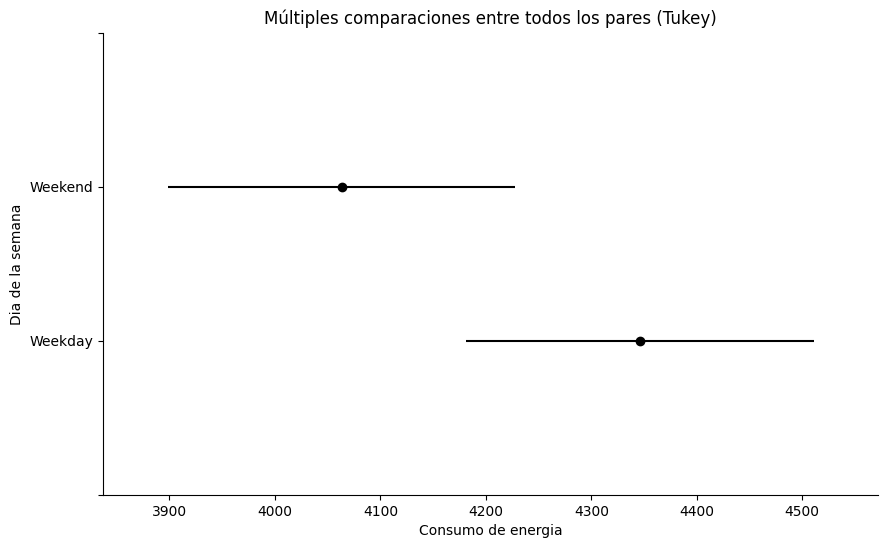

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['consumo_de_energia'], #variable de respuesta
    groups=df['dia_de_la_semana'], #variable categorica
    alpha=nivel_de_significancia) #nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Dia de la semana", xlabel="Consumo de energia")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Muestra los intervalos o niveles de confianza en las lineas, lo cual según el gráfico el dia de la semana en que
#consume más energia es en weekday

In [11]:
df["dia_de_la_semana"]=df["dia_de_la_semana"].map({"Weekday":1,"Weekend":0})
df

,tipo_de_edificio,tamaño_del_edificio,numero_de_ocupantes,electrodomesticos_utilizados,temperatura_promedio,dia_de_la_semana,consumo_de_energia
0,0,24563,15,4,28.52,1,2865.57
1,1,27583,56,23,23.07,0,4283.80
2,1,45313,4,44,33.56,1,5067.83
3,0,41625,84,17,27.39,0,4624.30
4,0,36720,58,47,17.08,1,4820.59
...,...,...,...,...,...,...,...
95,1,1161,81,11,15.45,0,3010.81
96,0,37943,50,23,21.73,0,4248.49
97,1,1558,27,29,16.86,0,2843.60
98,2,2145,56,12,11.77,0,3348.39


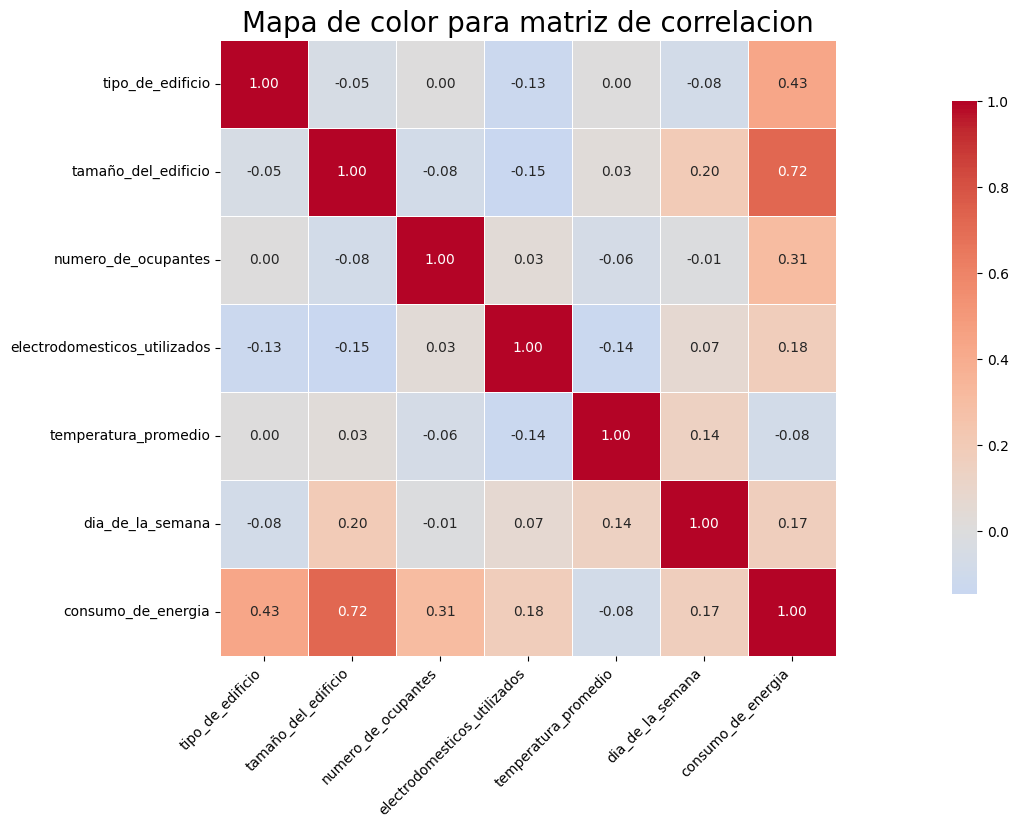

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion= df.corr()

plt.figure(figsize=(30,8), dpi= 100)

sns.heatmap(
    matriz_de_correlacion, #lo que va a graficar
    annot= True, #se muestran los valores en las celdas
    fmt= "0.2f", #0.2f significa "dos decimales"
    cmap= "coolwarm", #paleta de colores
    square= True, #forzar cuadrados
    linewidths= 0.5, #grosor de lineas
    cbar_kws= {"shrink":0.8}, #tamaño barra lateral
    center= 0,
    )

plt.title("Mapa de color para matriz de correlacion", fontsize=20)
plt.xticks(rotation= 45, ha= "right")
plt.yticks(rotation= 0)
plt.show()

In [13]:
matriz_de_correlacion["tipo_de_edificio"].sort_values()

,tipo_de_edificio
electrodomesticos_utilizados,-0.126826
dia_de_la_semana,-0.078879
tamaño_del_edificio,-0.048964
numero_de_ocupantes,0.003282
temperatura_promedio,0.003972
consumo_de_energia,0.432908
tipo_de_edificio,1.000000


In [14]:
matriz_de_correlacion["tamaño_del_edificio"].sort_values()

,tamaño_del_edificio
electrodomesticos_utilizados,-0.145933
numero_de_ocupantes,-0.080458
tipo_de_edificio,-0.048964
temperatura_promedio,0.030612
dia_de_la_semana,0.202413
consumo_de_energia,0.724039
tamaño_del_edificio,1.000000


In [15]:
matriz_de_correlacion["numero_de_ocupantes"].sort_values()

,numero_de_ocupantes
tamaño_del_edificio,-0.080458
temperatura_promedio,-0.063608
dia_de_la_semana,-0.014976
tipo_de_edificio,0.003282
electrodomesticos_utilizados,0.034320
consumo_de_energia,0.308594
numero_de_ocupantes,1.000000


In [16]:
matriz_de_correlacion["electrodomesticos_utilizados"].sort_values()

,electrodomesticos_utilizados
tamaño_del_edificio,-0.145933
temperatura_promedio,-0.136386
tipo_de_edificio,-0.126826
numero_de_ocupantes,0.034320
dia_de_la_semana,0.072980
consumo_de_energia,0.176380
electrodomesticos_utilizados,1.000000


In [17]:
matriz_de_correlacion["temperatura_promedio"].sort_values()

,temperatura_promedio
electrodomesticos_utilizados,-0.136386
consumo_de_energia,-0.079733
numero_de_ocupantes,-0.063608
tipo_de_edificio,0.003972
tamaño_del_edificio,0.030612
dia_de_la_semana,0.143007
temperatura_promedio,1.000000


In [18]:
matriz_de_correlacion["dia_de_la_semana"].sort_values()

,dia_de_la_semana
tipo_de_edificio,-0.078879
numero_de_ocupantes,-0.014976
electrodomesticos_utilizados,0.072980
temperatura_promedio,0.143007
consumo_de_energia,0.169386
tamaño_del_edificio,0.202413
dia_de_la_semana,1.000000


In [19]:
matriz_de_correlacion["consumo_de_energia"].sort_values()

,consumo_de_energia
temperatura_promedio,-0.079733
dia_de_la_semana,0.169386
electrodomesticos_utilizados,0.176380
numero_de_ocupantes,0.308594
tipo_de_edificio,0.432908
tamaño_del_edificio,0.724039
consumo_de_energia,1.000000


Coeficiente de determinación:  1.0000

const                           1500.009710
tamaño_del_edificio                0.050000
numero_de_ocupantes                9.999942
electrodomesticos_utilizados      19.999827
dia_de_la_semana                  50.005180
temperatura_promedio              -5.000058
tipo_de_edificio                 499.997678
dtype: float64 

valor-p de Shapiro:  0.0085

valor_p de Breusch-Pagan:  0.1711

para x_1=12500, x_2=12, x_3=30, x_4=1, x_5=25, x_6=2 y = [3770.00178093] consumo estimado

Para un edificio Industrial de 12,500 m², con 12 ocupantes, 30 electrodomésticos, temperatura promedio de 25°C y siendo miércoles, el consumo estimado de energía es de: 3770.00



,df,sum_sq,mean_sq,F,PR(>F)
C(dia_de_la_semana),1.0,1.968893e+06,1.968893e+06,9.978503e+09,0.000000e+00
C(tipo_de_edificio),2.0,1.554227e+07,7.771135e+06,3.938472e+10,0.000000e+00
tamaño_del_edificio,1.0,3.387918e+07,3.387918e+07,1.717023e+11,0.000000e+00
numero_de_ocupantes,1.0,9.275636e+06,9.275636e+06,4.700965e+10,0.000000e+00
electrodomesticos_utilizados,1.0,7.842723e+06,7.842723e+06,3.974753e+10,0.000000e+00
temperatura_promedio,1.0,1.137355e+05,1.137355e+05,5.764203e+08,1.815926e-314
Residual,92.0,1.815284e-02,1.973135e-04,NaN,NaN


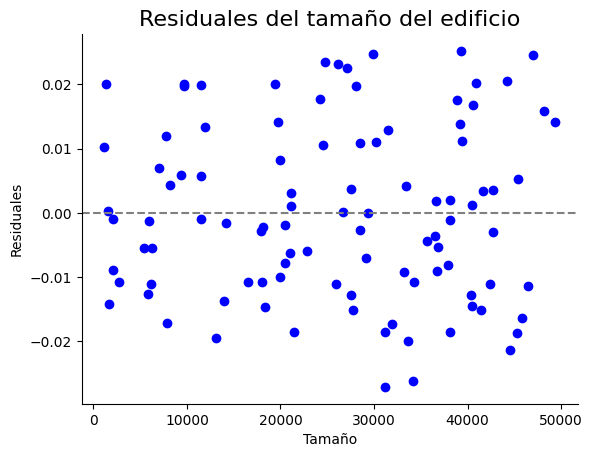

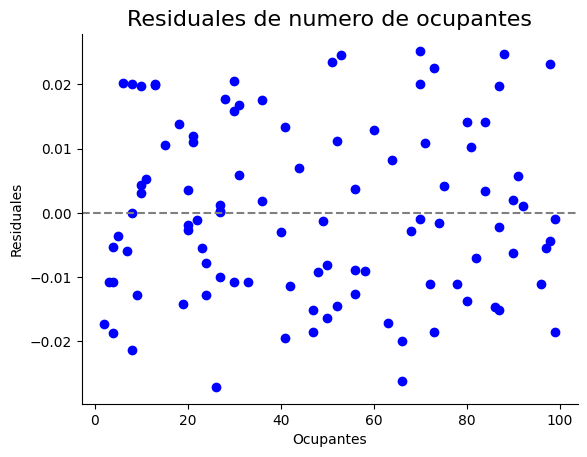

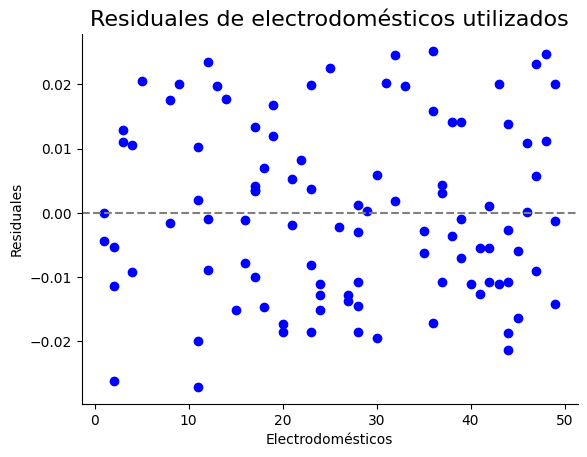

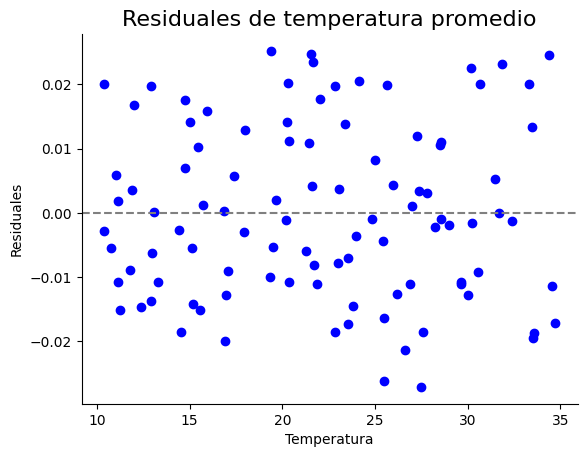

In [20]:
x = df[["tamaño_del_edificio", "numero_de_ocupantes", "electrodomesticos_utilizados", "dia_de_la_semana", "temperatura_promedio", "tipo_de_edificio"]]
y = df["consumo_de_energia"]


# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)



# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')


#Expresión matemática
print(modelo.params,"\n")


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.scatter(x["tamaño_del_edificio"], residuales, color = 'blue')
plt.xlabel('Tamaño')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales del tamaño del edificio", fontsize=16)

plt.figure()
plt.scatter(x["numero_de_ocupantes"], residuales, color = 'blue')
plt.xlabel('Ocupantes')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de numero de ocupantes", fontsize=16)

plt.figure()
plt.scatter(x["electrodomesticos_utilizados"], residuales, color = 'blue')
plt.xlabel('Electrodomésticos')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de electrodomésticos utilizados", fontsize=16)

plt.figure()
plt.scatter(x["temperatura_promedio"], residuales, color = 'blue')
plt.xlabel('Temperatura')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de temperatura promedio", fontsize=16)


# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')


# 10. Realice la prueba de Breusch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# 11.
#print(f"Para edificio Industrial, 12500 ft², 12 ocupantes, 30 aparatos, 25°C y miércoles, el consumo esperado es {modelo.predict([[0, 12500, 12, 30, 25, 3]])[0]:.2f} unidades\n")
print(f'para x_1=12500, x_2=12, x_3=30, x_4=1, x_5=25, x_6=2 y = {modelo.predict([[1,12500,12,30,1,25,2]])} consumo estimado\n')

consumo_estimado = modelo.predict([[1, 12500, 12, 30, 1, 25, 2]])

print(f'Para un edificio Industrial de 12,500 m², con 12 ocupantes, 30 electrodomésticos, '
      f'temperatura promedio de 25°C y siendo miércoles, '
      f'el consumo estimado de energía es de: {consumo_estimado[0]:.2f}\n')



#12
from statsmodels.formula.api import ols
modelo_lineal = ols('consumo_de_energia ~ tamaño_del_edificio + numero_de_ocupantes + electrodomesticos_utilizados + C(dia_de_la_semana) + temperatura_promedio + C(tipo_de_edificio)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova